### Carga de librerías y lectura de datos

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [18]:
df = pd.read_csv('./data/habitantes_De_calle_2022.csv')
print(df.shape)
df.head()

(6248, 121)


,Departamento,Municipio o área no municipalizada,Clase,Localidad,Lugar de la entrevista,Tipo de diligenciamiento del cuestionario,edad,hombre o mujer,tipo de documento,Dónde nació,...,Sexo,Edad estimada,La entrevista no se realizó porque la persona estaba Muy alterada por el efecto de sustancias psicoactivas,La entrevista no se realizó porque la persona estaba Dormida,La entrevista no se realizó porque la persona estaba Con actitud agresiva,La entrevista no se realizó porque la persona estaba Aparentemente con problemas de salud mental,La entrevista no se realizó porque la persona estaba Totalmente desinteresada,La entrevista no se realizó porque la persona estaba Hay condiciones de riesgo para los encuestadores,La entrevista no se realizó porque la persona estaba Otra,Identificador de finalización de la encuesta
0,85,85001,1,5.0,2,1,44.0,1.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,85,85001,1,5.0,2,1,33.0,1.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,85,85001,1,5.0,2,1,41.0,1.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,85,85001,1,5.0,2,1,29.0,1.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,85,85001,1,5.0,2,1,30.0,1.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


### Exploración e imputación

In [ ]:
# Eliminación de registros y columnas 
df = df.dropna(subset=['edad']) # Se eliminan aquellos registros que no tengan datos en la gran mayoría de columnas tomando la columna edad como referencia
df = df.dropna(how='all') # Se eliminan registros que no contengan almenos un dato
df = df.dropna(how='all', axis=1) # Se eliminan columnas que no tengan almenos un dato

<Axes: >

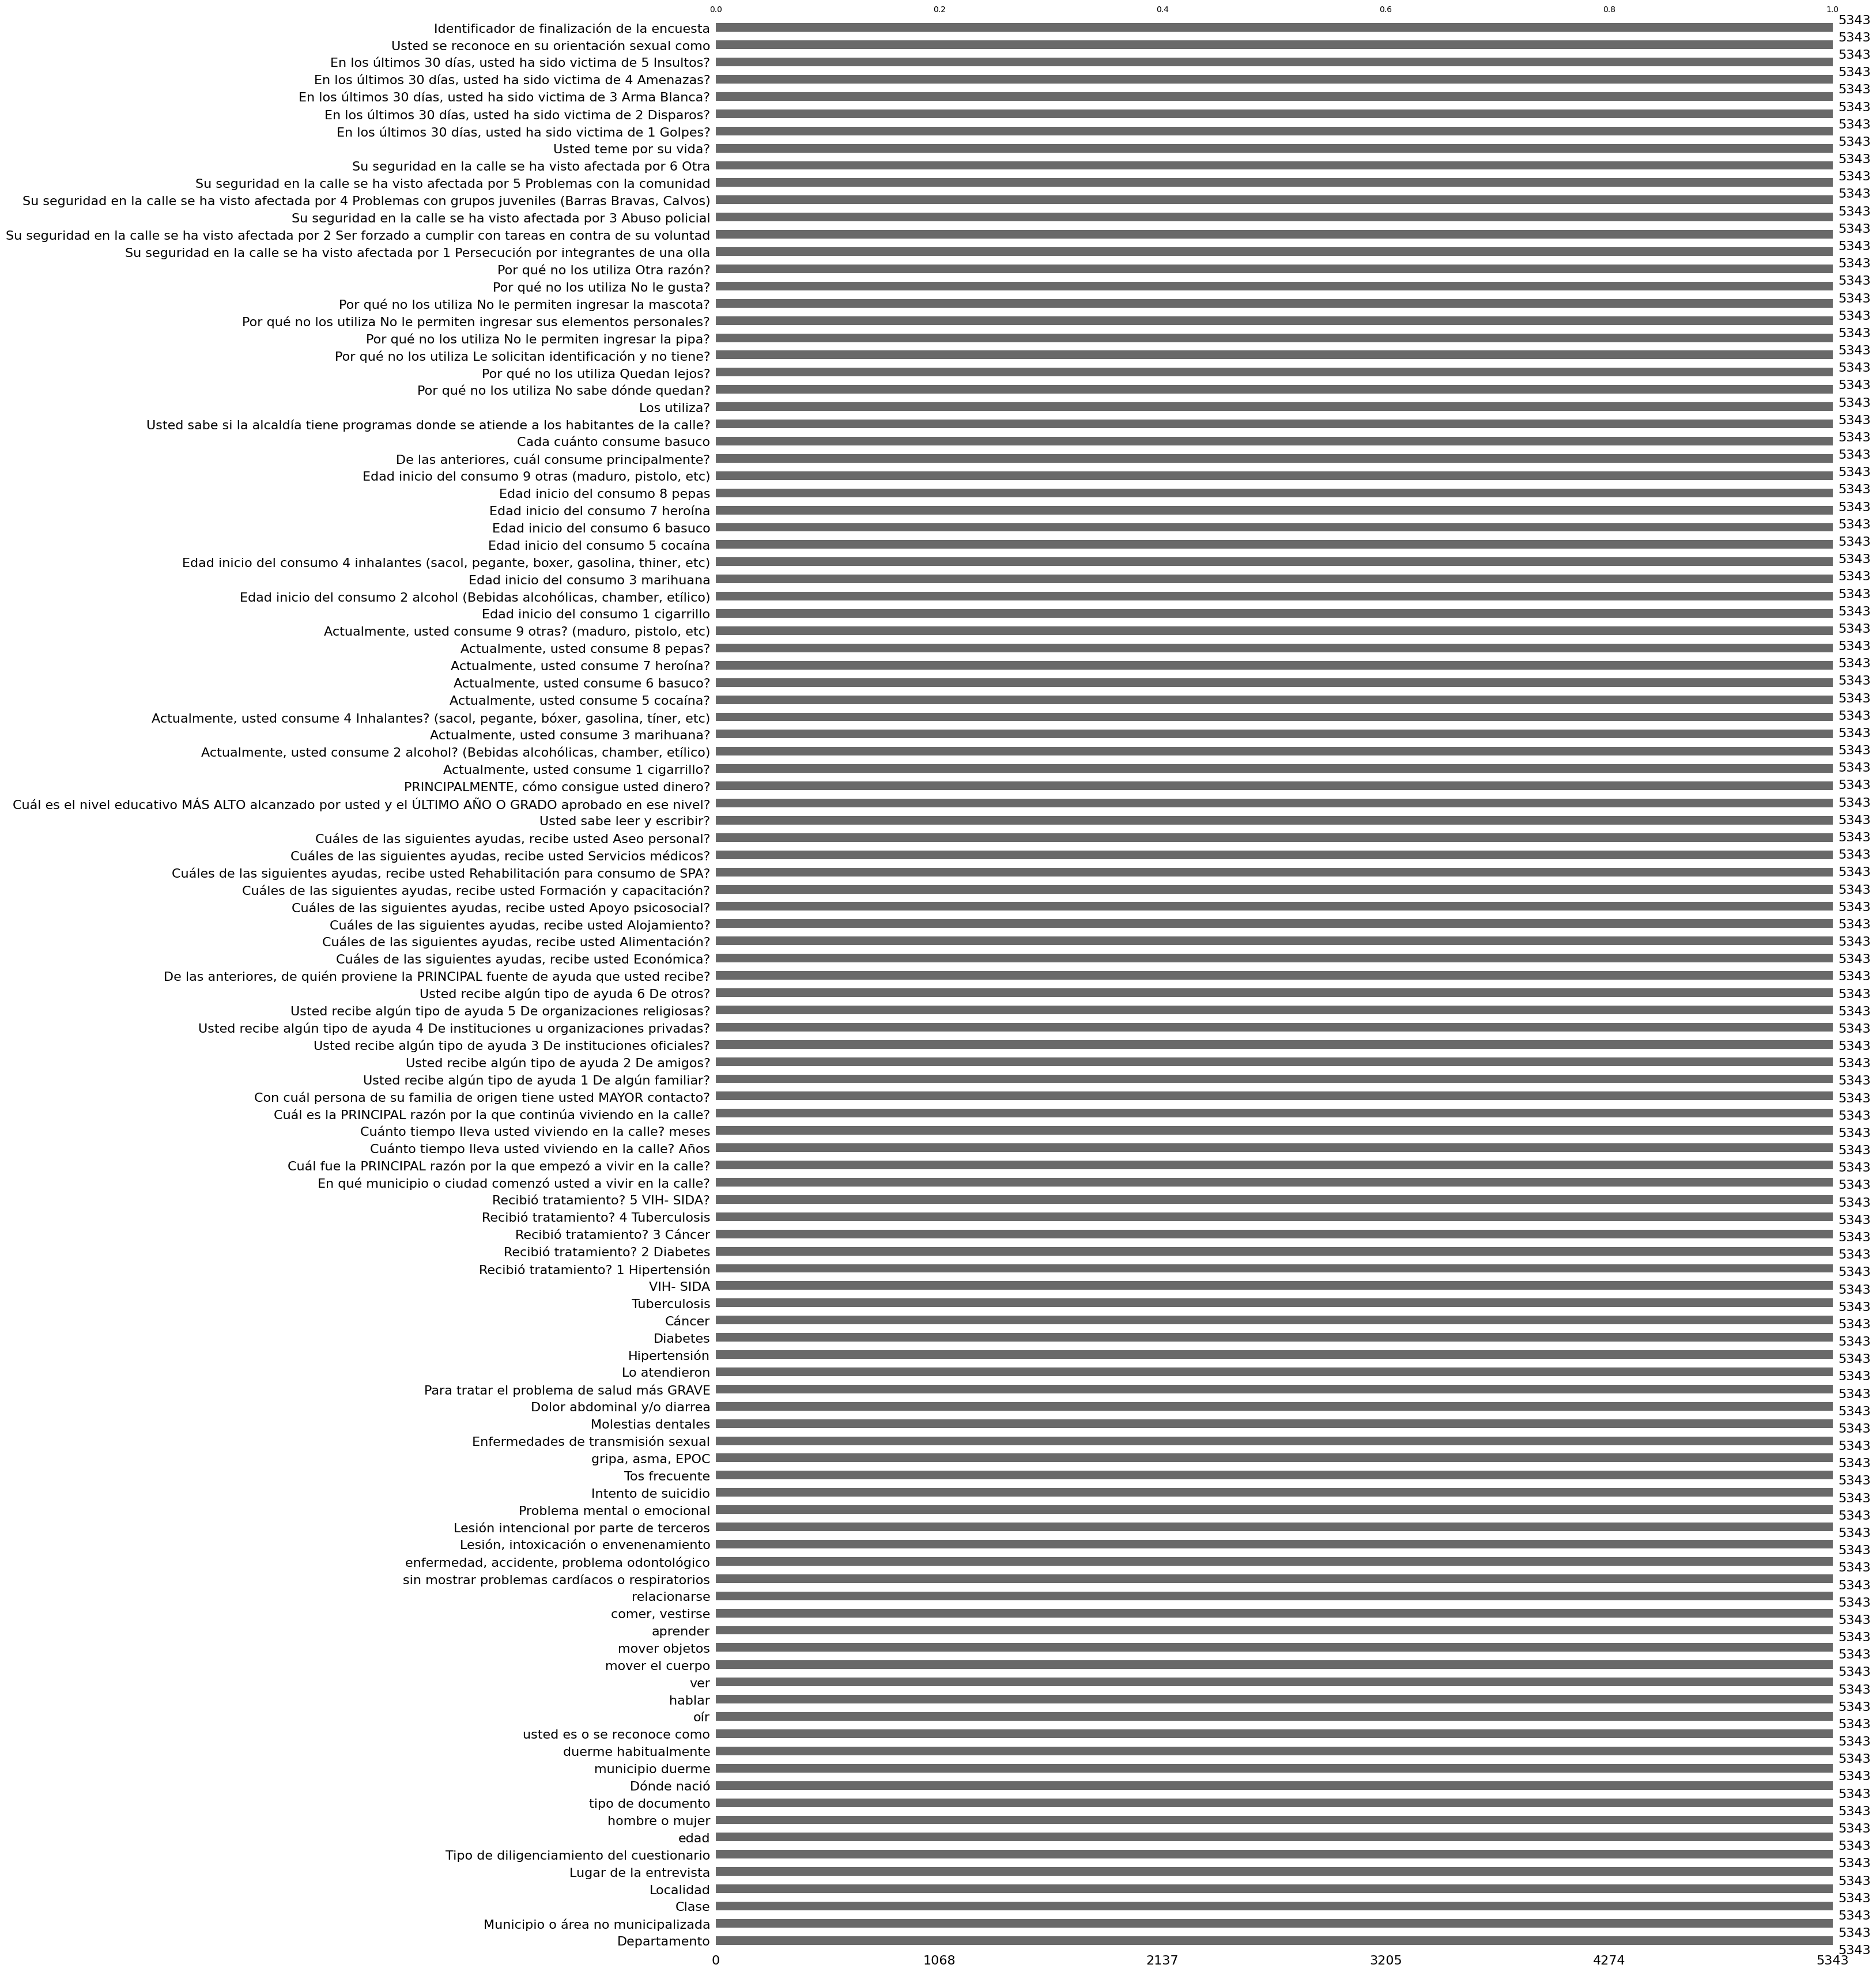

In [78]:
# Gráfica de nulos
msno.bar(df)

#### Tratamiento de columnas con muchos nulos y con posible respuesta 1 = verdadero o 2 = falso

In [ ]:
# Definición de funciones

def impre_datos_unicos(data, columnas):
    ''' Imprime los valores únicos de cada columna '''
    for col in columnas:
        print('*'*5, col, '*'*5)
        print(data[col].unique(),'\n')

def imput_falso(data, columnas, valor=2):
    ''' Imputa los campos nulos '''
    for col in columnas:
        data[col] = data[col].fillna(valor)

1. Utilización de programas del gobierno para atención de habitantes de calle

In [ ]:
# Impresión de datos únicos de las columnas
col_por_que_no_utiliza = [col for col in df.columns if col.lower().startswith('por qué no los utiliza')]
col_por_que_no_utiliza.append('Los utiliza?')

impre_datos_unicos(df, col_por_que_no_utiliza)

***** Por qué no los utiliza No sabe dónde quedan? *****
[2. 1.] 

***** Por qué no los utiliza Quedan lejos? *****
[2. 1.] 

***** Por qué no los utiliza Le solicitan identificación y no tiene? *****
[2. 1.] 

***** Por qué no los utiliza No le permiten ingresar la pipa? *****
[2. 1.] 

***** Por qué no los utiliza No le permiten ingresar sus elementos personales? *****
[2. 1.] 

***** Por qué no los utiliza No le permiten ingresar la mascota? *****
[2. 1.] 

***** Por qué no los utiliza No le gusta? *****
[2. 1.] 

***** Por qué no los utiliza Otra razón? *****
[2. 1.] 

***** Los utiliza? *****
[2. 1.] 



In [ ]:
# Imputación con 2/Falso
imput_falso(df, col_por_que_no_utiliza)

2. Enfermedades, lesiones, problemas mentales, suicidio

In [42]:
# Impresión de datos únicos de las columnas
palabras_clave_enfermedad = ['enfermedad', 'lesión', 'mental', 'suicidio', 'tos frecuente', 'gripa', 'enfermedades', 'molestias', 'abdominal']
col_enfermedades = [col for col in df.columns if any(palabra.lower() in col.lower() for palabra in palabras_clave_enfermedad)]
col_enfermedades.append('Lo atendieron')

impre_datos_unicos(df, col_enfermedades)

***** enfermedad, accidente, problema odontológico *****
[2. 1.] 

***** Lesión, intoxicación o envenenamiento *****
[2. 1.] 

***** Lesión intencional por parte de terceros *****
[2. 1.] 

***** Problema mental o emocional *****
[2. 1.] 

***** Intento de suicidio *****
[2. 1.] 

***** Tos frecuente *****
[2. 1.] 

***** gripa, asma, EPOC *****
[2. 1.] 

*****  Enfermedades de transmisión sexual *****
[2. 1.] 

***** Molestias dentales *****
[2. 1.] 

*****  Dolor abdominal y/o diarrea *****
[1. 2.] 

***** Lo atendieron *****
[1. 2.] 



In [43]:
# Imputación con 2/Falso
imput_falso(df, col_enfermedades)

3. Recibió tratamiento

In [ ]:
# Impresión de datos únicos de las columnas
col_recibio_tratamiento = [col for col in df.columns if col.lower().startswith('recibió tratamiento')]

impre_datos_unicos(df, col_recibio_tratamiento)

***** Recibió tratamiento? 1 Hipertensión *****
[2. 1.] 

***** Recibió tratamiento? 2 Diabetes *****
[2. 1.] 

***** Recibió tratamiento? 3 Cáncer *****
[2. 1.] 

***** Recibió tratamiento? 4 Tuberculosis *****
[2. 1.] 

***** Recibió tratamiento? 5 VIH- SIDA? *****
[2. 1.] 



In [45]:
# Imputación con 2/Falso
imput_falso(df, col_recibio_tratamiento)

4. Recibe ayudas

In [ ]:
# Captura de nombres de columnas
col_ayudas = [col for col in df.columns if col.lower().startswith('cuáles de las siguientes')]

impre_datos_unicos(df, col_ayudas)

***** Cuáles de las siguientes ayudas, recibe usted Económica? *****
[2. 1.] 

***** Cuáles de las siguientes ayudas, recibe usted Alimentación? *****
[2. 1.] 

***** Cuáles de las siguientes ayudas, recibe usted Alojamiento? *****
[2. 1.] 

***** Cuáles de las siguientes ayudas, recibe usted Apoyo psicosocial? *****
[1. 2.] 

***** Cuáles de las siguientes ayudas, recibe usted Formación y capacitación? *****
[2. 1.] 

***** Cuáles de las siguientes ayudas, recibe usted Rehabilitación para consumo de SPA? *****
[2. 1.] 

***** Cuáles de las siguientes ayudas, recibe usted Servicios médicos? *****
[2. 1.] 

***** Cuáles de las siguientes ayudas, recibe usted Aseo personal? *****
[2. 1.] 



In [47]:
# Imputación con 2/Falso
imput_falso(df, col_ayudas)

#### Tratamiento de columnas con más de dos posibles respuestas

In [71]:
# Definición de funciones

def graficar_distri(data, columnas):
    ''' Grafica un histogramacon por cada columna con la distribución de los datos'''
    n_cols = 3
    n_rows = (len(columnas) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(columnas):
        data[col].dropna().plot.hist(ax=axes[i], bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(col)

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


def imputar_mediana(data, columnas):
    ''' Imputa nulos con la mediana '''
    for col in columnas:
        data[col] = data[col].fillna(data[col].median())


def imputar_moda(data, columnas):
    ''' Imputa nulos con la moda '''
    for col in columnas:
        data[col] = data[col].fillna(data[col].mode()[0])

1. Edad inicio de consumo

In [ ]:
# Captura de nombres de columnas
col_edad_consumo = [col for col in df.columns if col.lower().startswith('edad inicio')]

['Edad inicio del consumo 1 cigarrillo',
 'Edad inicio del consumo 2 alcohol (Bebidas alcohólicas, chamber, etílico)',
 'Edad inicio del consumo 3 marihuana',
 'Edad inicio del consumo 4 inhalantes (sacol, pegante, boxer, gasolina, thiner, etc)',
 'Edad inicio del consumo 5 cocaína',
 'Edad inicio del consumo 6 basuco',
 'Edad inicio del consumo 7 heroína',
 'Edad inicio del consumo 8 pepas',
 'Edad inicio del consumo 9 otras (maduro, pistolo, etc)']

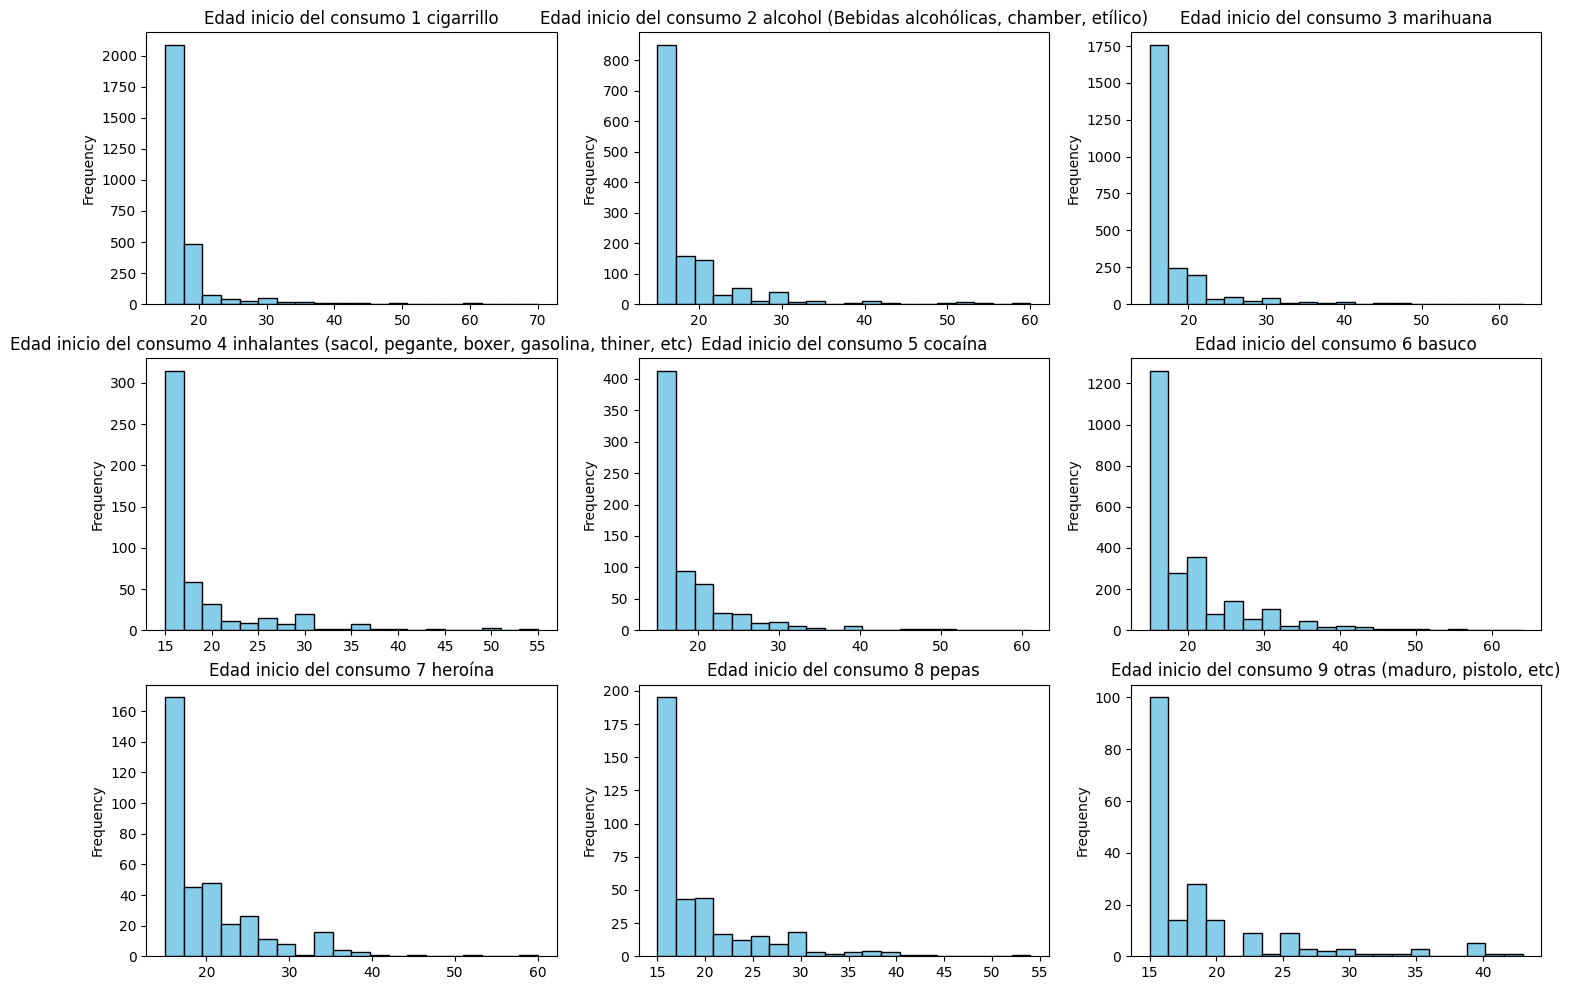

In [57]:
graficar_distri(df, col_edad_consumo)

In [58]:
imputar_mediana(df, col_edad_consumo)

2. Otras columnas con más de un campo nulo

In [ ]:
# Captura de nombres de columnas
col_varios_nulos = df.columns[df.isnull().sum() > 5].to_list()

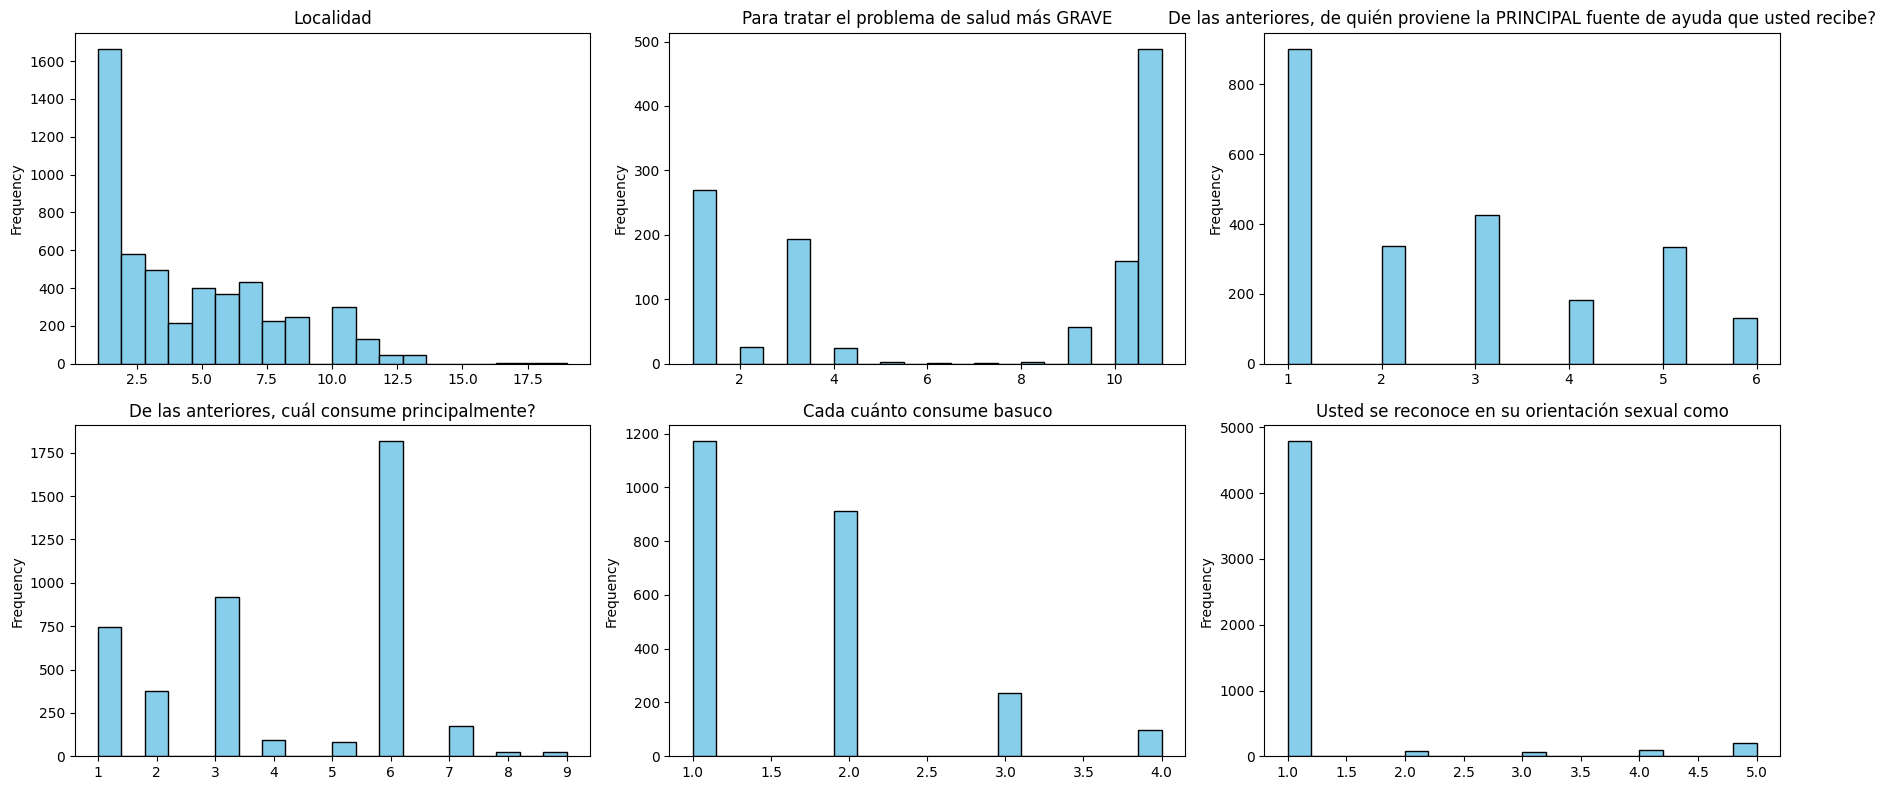

In [69]:
graficar_distri(df, col_varios_nulos)

In [72]:
imputar_moda(df, col_varios_nulos)

#### Tratamiento de otras columnas con campos nulos

In [75]:
otras_columnas = df.columns[df.isnull().any()].to_list()

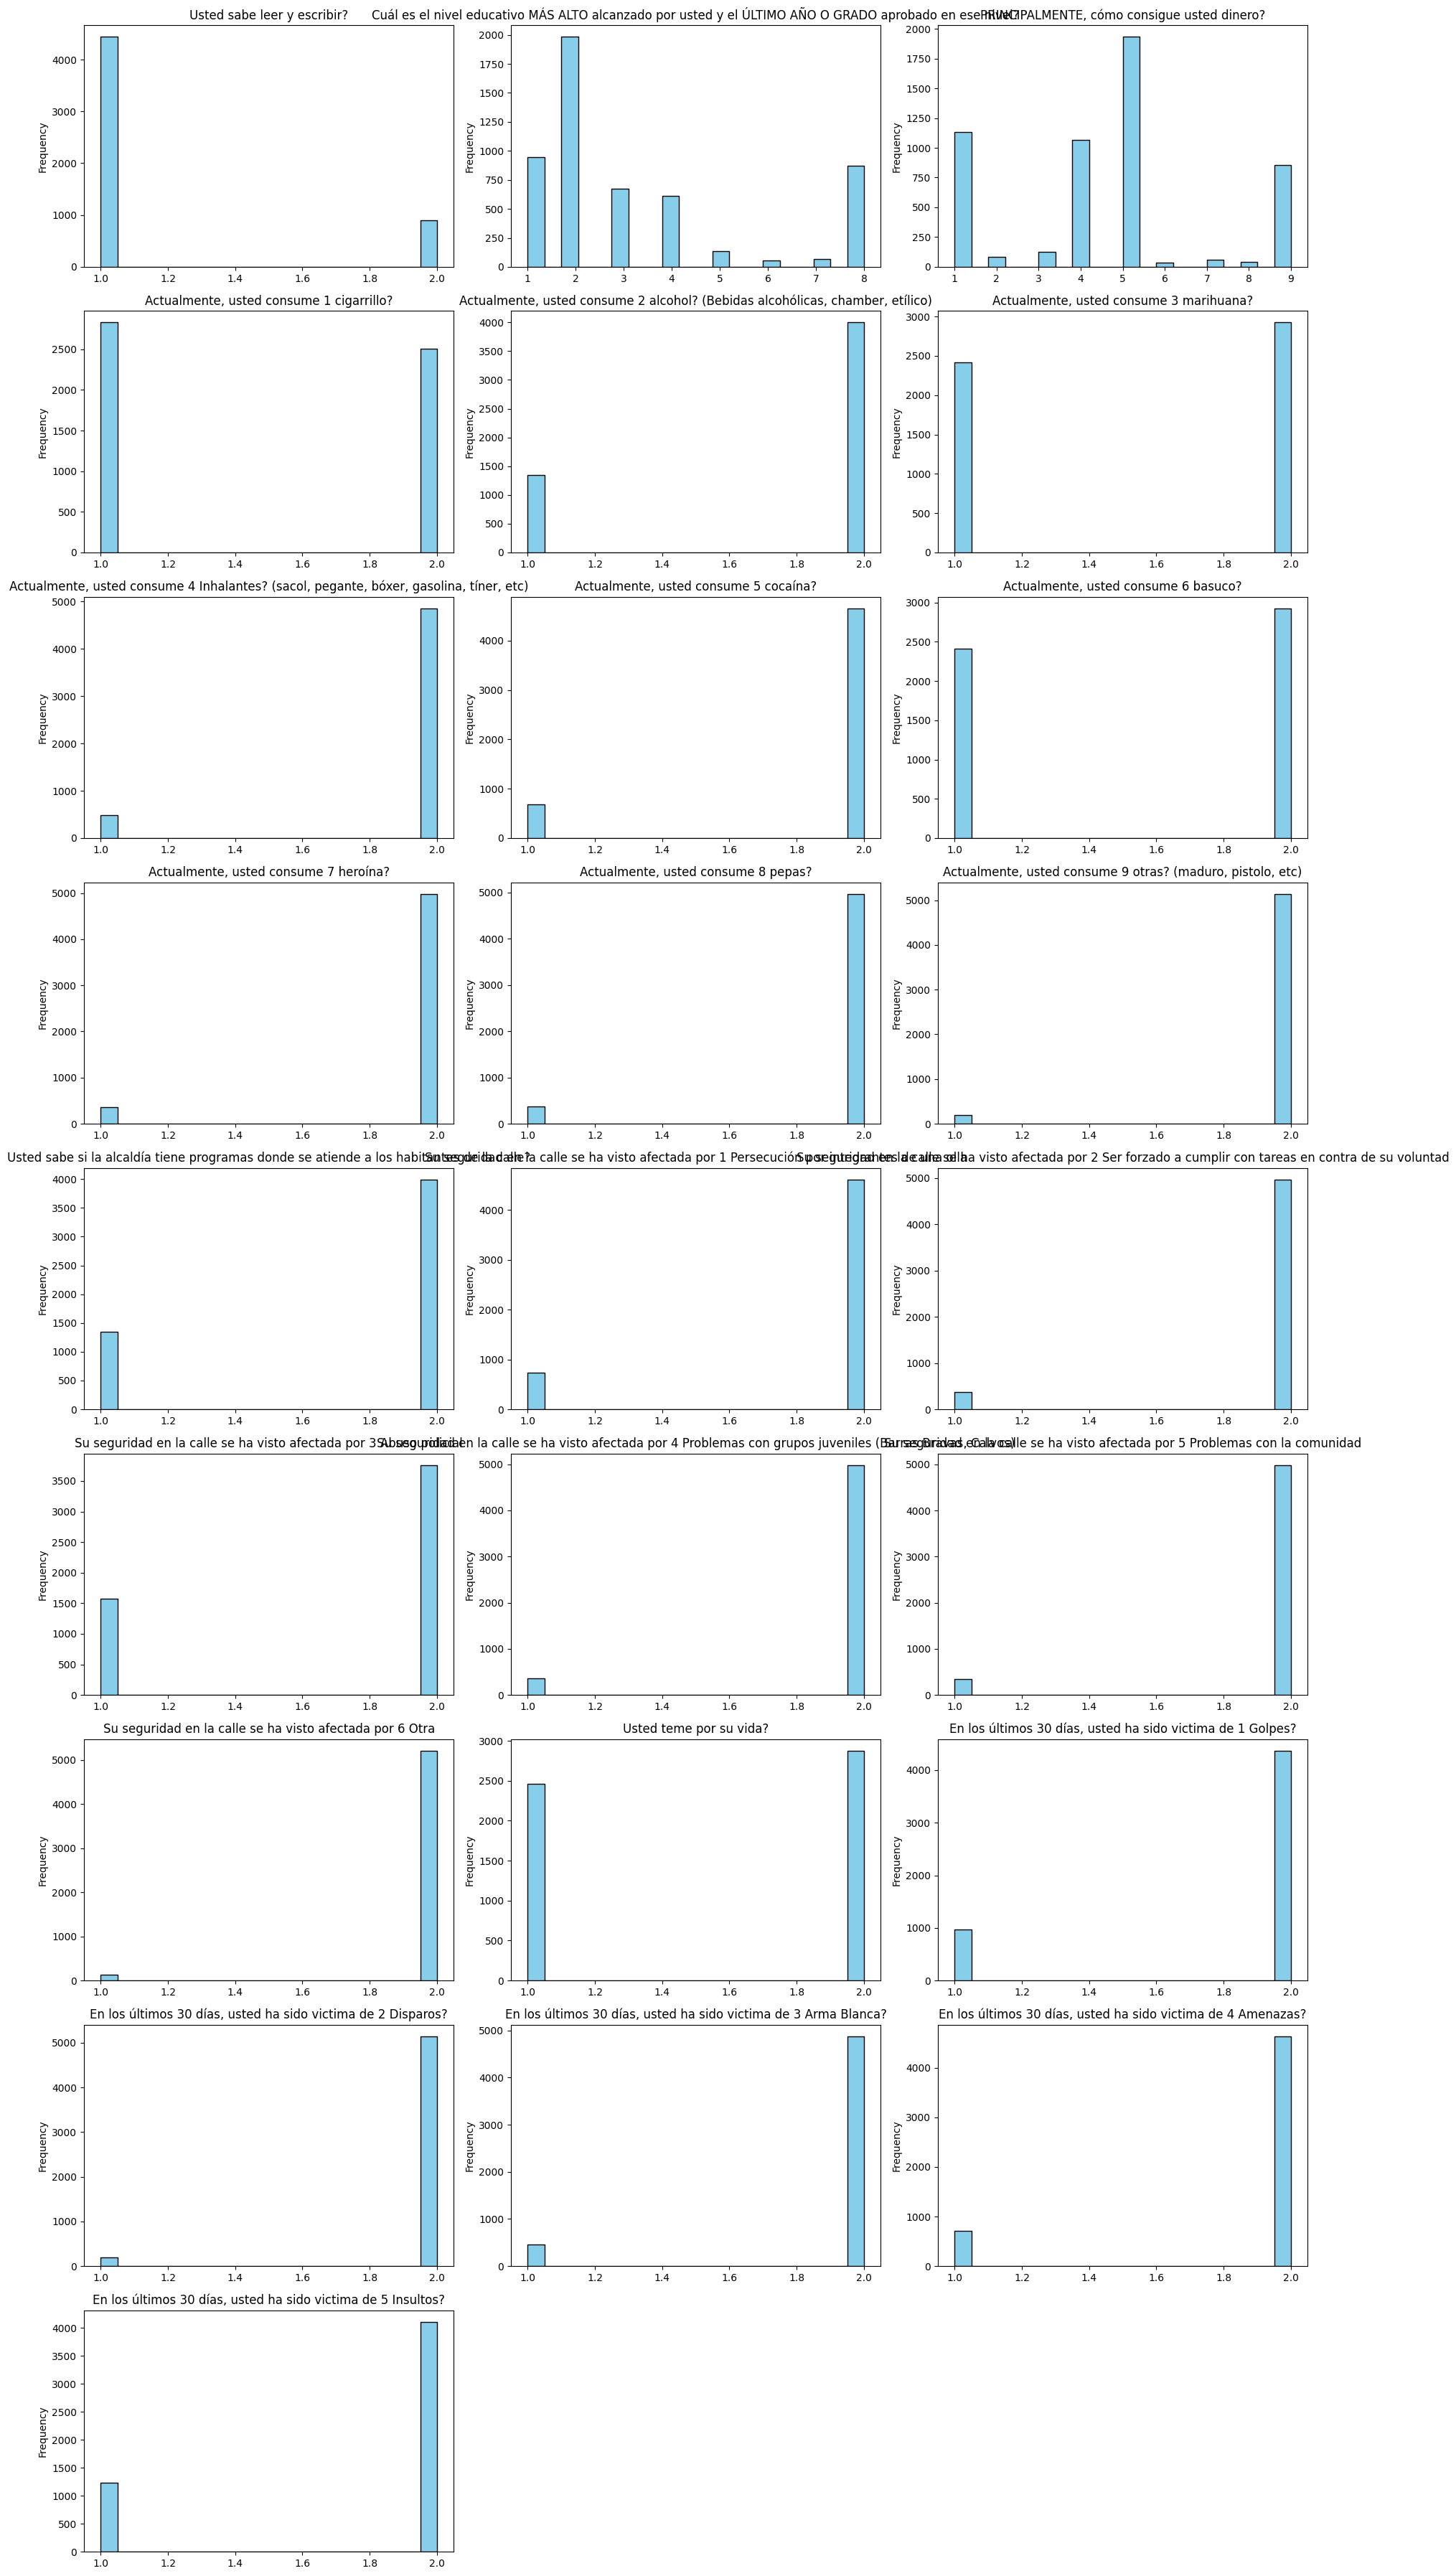

In [76]:
graficar_distri(df, otras_columnas)

In [77]:
imputar_moda(df, otras_columnas)